Cho dữ liệu Iris.xls
Yêu cầu: Thực hiện linenear regression để từ sepallength, sepalwidth,
petallength => dự đoán petalwidth
1. Đọc dữ liệu, trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là sepallength, sepalwidth, petallength
(inputs) và petalwidth (outputs) với tỷ lệ dữ liệu test là 0.2
3. Áp dụng linrear regression
4. Vẽ hình. Nhận xét kết quả
5. Nếu sepallength, sepalwidth, petallength là 4.5, 3.1, 1.6 => petalwidth là bao nhiêu?
6. Áp dụng lựa chọn thuộc tính quan trọng cho model. Xây dựng lại model sau khi lựa chọn các
thuộc tính quan trọng.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

# <span style='color:yellow;'>1. Đọc dữ liệu, trực quan hóa dữ liệu.

In [4]:
iris = pd.read_excel('Data/Iris.xls')
iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


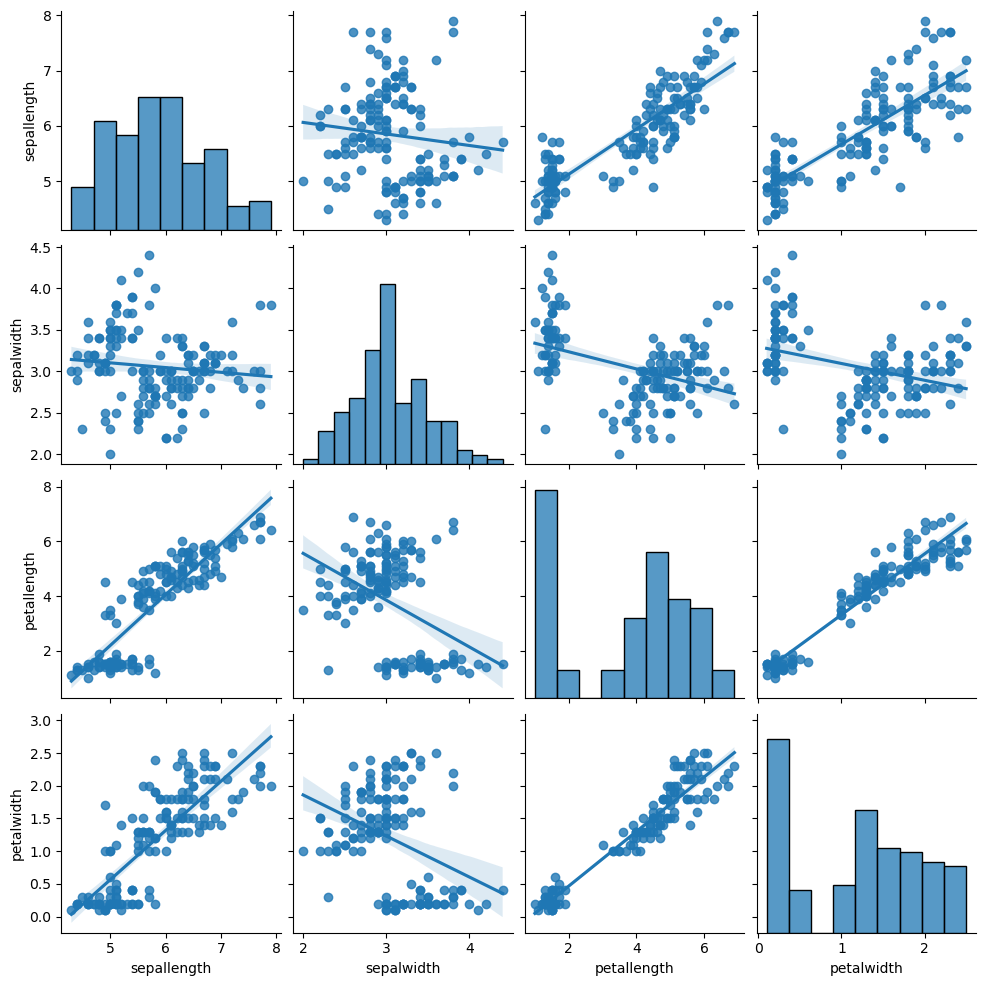

In [11]:
sbn.pairplot(iris.iloc[:,:-1], kind='reg');

In [12]:
iris.iloc[:,:-1].corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


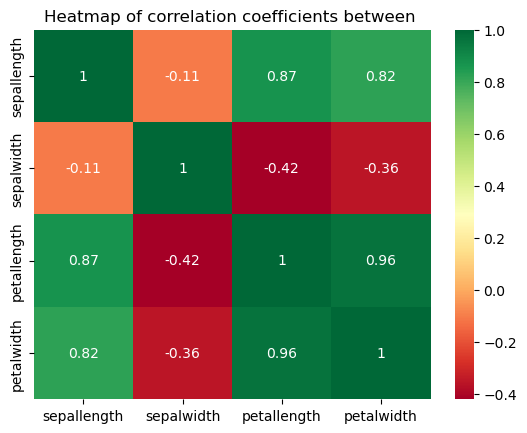

In [13]:
hmap = sbn.heatmap(iris.iloc[:,:-1].corr(), cmap='RdYlGn', annot=True)
plt.title('Heatmap of correlation coefficients between ')
plt.show()

# <span style='color:yellow;'>2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là sepallength, sepalwidth, petallength (inputs) và petalwidth (outputs) với tỷ lệ dữ liệu test là 0.2

In [15]:
x = iris[['sepallength', 'sepalwidth', 'petallength']]
y = iris['petalwidth']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# <span style='color:yellow;'> 3. Áp dụng linrear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
linreg_multi = LinearRegression().fit(x_train, y_train)

b = linreg_multi.coef_
b0 = linreg_multi.intercept_

print(f'Intercept = {b0}')
print(f'Coefficients = {b}\n')

print(f'petalwidth_predict = \n{b0} + {b[0]}*sepallength + {b[1]}*sepalwidth + {b[2]}*petallength\n')

y_predict = linreg_multi.predict(x_test)

print(f'R^2 score on whole set: {linreg_multi.score(x, y)}')
print(f'R^2 score on train set: {linreg_multi.score(x_train, y_train)}')
print(f'R^2 score on test set: {linreg_multi.score(x_test, y_test)}')
print()
print(f'MSE on test set = {mean_squared_error(y_test, y_predict)}')
print(f'MAE on test set = {mean_absolute_error(y_test, y_predict)}')

Intercept = -0.15540169597705278
Coefficients = [-0.2730168   0.27491728  0.56124799]

petalwidth_predict = 
-0.15540169597705278 + -0.27301680498817044*sepallength + 0.27491728083242783*sepalwidth + 0.5612479879439888*petallength

R^2 score on whole set: 0.9371686953873613
R^2 score on train set: 0.9442290368789543
R^2 score on test set: 0.9012240098380548

MSE on test set = 0.047899770162532586
MAE on test set = 0.16965973102386356


# <span style='color:yellow;'> 4. Vẽ hình. Nhận xét kết quả

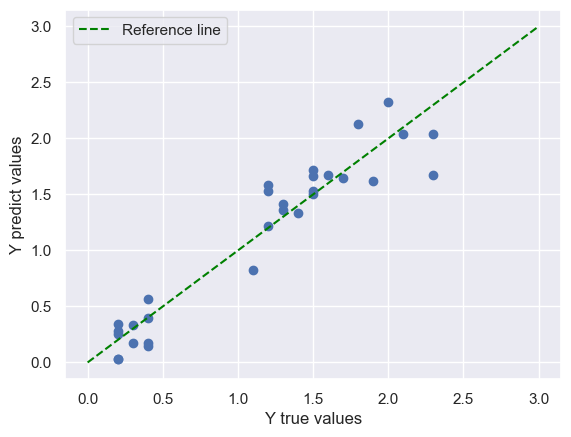

In [28]:
sbn.set_theme(style='darkgrid')

plt.scatter(y_test, y_predict)
plt.plot([0,3], [0,3], '--', color='green', label='Reference line')
plt.xlabel('Y true values')
plt.ylabel('Y predict values')
plt.legend()
plt.show()

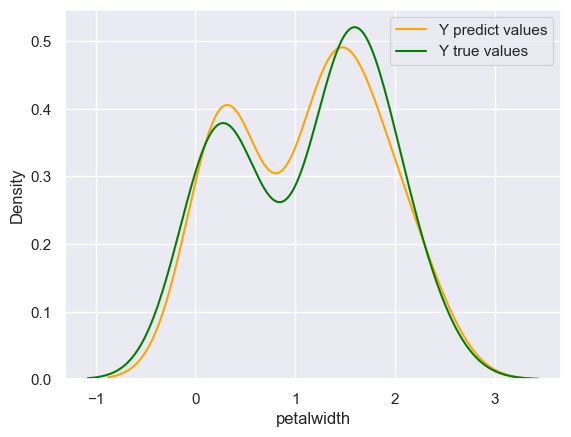

In [30]:
sbn.kdeplot(y_test, color='orange', label='Y predict values')
sbn.kdeplot(y_predict, color='green', label='Y true values')
plt.legend()
plt.show()

## The result of the model is good, R^2 scores on all datasets are all > 0.9
## The visualization plots show the according results

# <span style='color:yellow;'> 5. Nếu sepallength, sepalwidth, petallength là 4.5, 3.1, 1.6 => petalwidth là bao nhiêu?

In [34]:
iris_predict_new = pd.DataFrame({
    'sepallength':[4.5],
    'sepalwidth':[3.1],
    'petallength':[1.6]
})

iris_predict_new['petalwidth_predict'] = linreg_multi.predict(iris_predict_new[['sepallength', 'sepalwidth', 'petallength']])
iris_predict_new

,sepallength,sepalwidth,petallength,petalwidth_predict
0,4.5,3.1,1.6,0.366263


# <span style='color:yellow;'> 6. Áp dụng lựa chọn thuộc tính quan trọng cho model. Xây dựng lại model sau khi lựa chọn các thuộc tính quan trọng.

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

In [39]:
k_best = SelectKBest(score_func=f_regression, k='all').fit(x, y)

df_k_best_score = pd.DataFrame({
    'Feature_name':x.columns,
    'Score':k_best.scores_
})

df_k_best_score = df_k_best_score.sort_values('Score', ascending=False).reset_index(drop = True)

df_k_best_score['Cumulative_Percentage'] = np.cumsum(df_k_best_score['Score']) / df_k_best_score['Score'].sum()

print(df_k_best_score)

  Feature_name        Score  Cumulative_Percentage
0  petallength  1876.657813               0.854033
1  sepallength   299.194957               0.990191
2   sepalwidth    21.554378               1.000000
